# Customer Analytics

August 30, 2019

## 1. Load Data

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df=pd.read_csv('Data/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')

In [4]:
df.shape

(9134, 24)

In [5]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [6]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

## 2. Analytics on Engaged Customers

### 2.1 Overall Engagement rate

In [7]:
#How many customers responded?
df.groupby('Response').count()['Customer']

Response
No     7826
Yes    1308
Name: Customer, dtype: int64

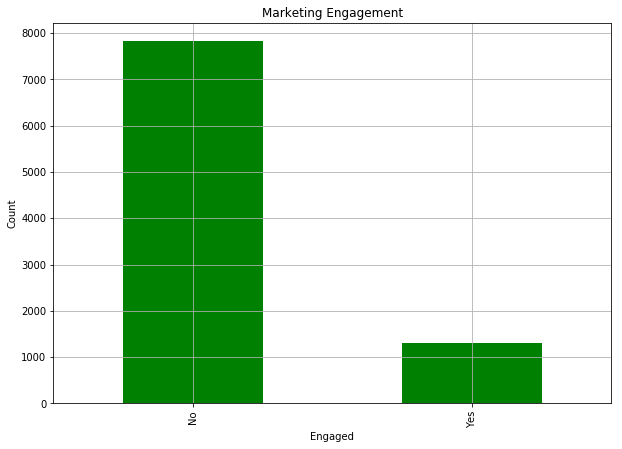

In [8]:
#Visualize this in a bar plot (显示网格)
ax=df.groupby('Response').count()['Customer'].plot(
  kind='bar',color='green',grid=True,figsize=(10,7),title='Marketing Engagement'
)
ax.set_xlabel('Engaged')
ax.set_ylabel('Count')

plt.show()

In [9]:
# Calculate the percentages of the engaged and non-engaged customers
df.groupby('Response').count()['Customer']/df.shape[0]

Response
No     0.856799
Yes    0.143201
Name: Customer, dtype: float64

14% of the customers responded to the marketing calls


## 2.2 Engagement Rates by Offer Type

In [10]:
# Get the engagement rates per renewal offer type
by_offer_type_df = df.loc[
    df['Response'] == 'Yes', # count only engaged customers
].groupby([
    'Renew Offer Type' #engaged customers grouped by renewal offer type
]).count()['Customer']/df.groupby('Renew Offer Type').count()['Customer']

by_offer_type_df

Renew Offer Type
Offer1    0.158316
Offer2    0.233766
Offer3    0.020950
Offer4         NaN
Name: Customer, dtype: float64

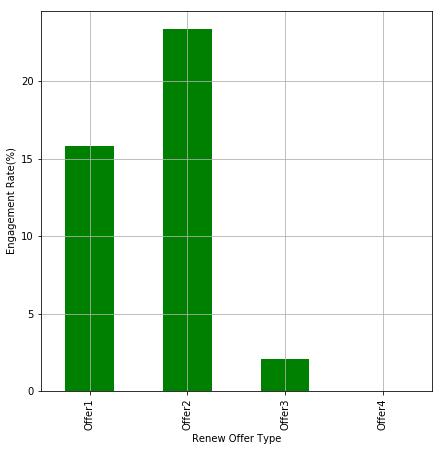

In [11]:
# Visualize it in a bar plot
ax=(by_offer_type_df*100).plot(
  kind='bar',figsize=(7,7),color='green',grid=True
)

ax.set_ylabel('Engagement Rate(%)')

plt.show()

Offer2 had the highest engagement rate among the customers

## 2.3 Offer Type & Vehicle Class

In [12]:
# engagements rates by each offer type and vehicle class.
by_offer_type_df = df.loc[
    df['Response'] == 'Yes', # engaged customers
].groupby([
    'Renew Offer Type','Vehicle Class' #grouping the data by these two columns
]).count()['Customer']/df.groupby('Renew Offer Type').count()['Customer']

by_offer_type_df

Renew Offer Type  Vehicle Class
Offer1            Four-Door Car    0.070362
                  Luxury Car       0.001599
                  Luxury SUV       0.004797
                  SUV              0.044776
                  Sports Car       0.011194
                  Two-Door Car     0.025586
Offer2            Four-Door Car    0.114833
                  Luxury Car       0.002051
                  Luxury SUV       0.004101
                  SUV              0.041012
                  Sports Car       0.016405
                  Two-Door Car     0.055366
Offer3            Four-Door Car    0.016760
                  Two-Door Car     0.004190
Name: Customer, dtype: float64

In [13]:
# Make the previous output more readable using unstack function
# to pivot the data and extract and transform the inner-level group to columns
# stack  将数据的列“旋转”为行
# unstack  将数据的行“旋转”为列
# df.fillna(0):使用0或'missing'替代缺失值
by_offer_type_df = by_offer_type_df.unstack().fillna(0)
by_offer_type_df

Vehicle Class,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car
Renew Offer Type,,,,,,
Offer1,0.070362,0.001599,0.004797,0.044776,0.011194,0.025586
Offer2,0.114833,0.002051,0.004101,0.041012,0.016405,0.055366
Offer3,0.016760,0.000000,0.000000,0.000000,0.000000,0.004190


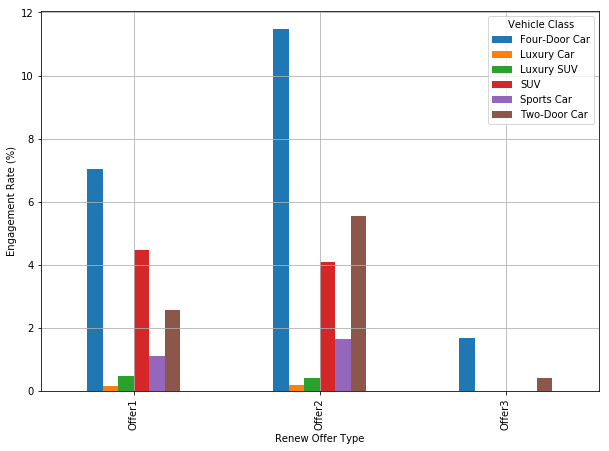

In [14]:
# Visualize this data in bar plot
ax = (by_offer_type_df*100).plot(
  kind='bar',figsize=(10,7), grid=True
)
ax.set_ylabel('Engagement Rate (%)')
plt.show()

If we have significantly difference in the
response rates among different customer rates, we can fine-tune who to target for different set
of offers.

除了Four-Door Car之外，Offer1目标客户是SUV，Offer2目标客户是Two-Door Car.

## 2.4 Engagement Rates by Sales Channel

In [15]:
by_sales_channel_df = df.loc[
    df['Response'] == 'Yes', # count only engaged customers
].groupby([
    'Sales Channel' #engaged customers grouped by sales channel
]).count()['Customer']/df.groupby('Sales Channel').count()['Customer']

by_sales_channel_df

Sales Channel
Agent          0.191544
Branch         0.114531
Call Center    0.108782
Web            0.117736
Name: Customer, dtype: float64

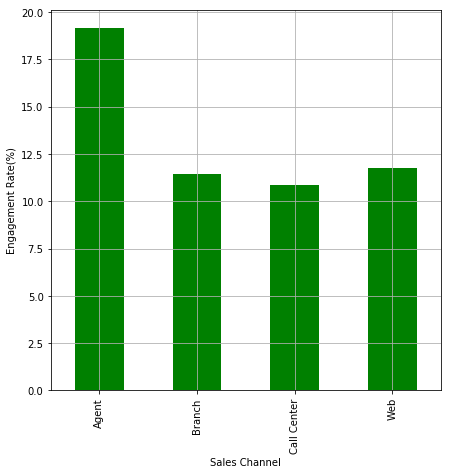

In [16]:
# Visualize it in a bar plot
ax=(by_sales_channel_df*100).plot(
  kind='bar',figsize=(7,7),color='green',grid=True
)

ax.set_ylabel('Engagement Rate(%)')

plt.show()

 ## 2.5 Sales Channel & Vehicle Size

In [17]:
# whether customers with various vehicle sizes respond differently to different sales channels
by_sales_channel_df = df.loc[
    df['Response'] == 'Yes', # count only engaged customers
].groupby([
    'Sales Channel','Vehicle Size' #grouping the data by these two columns
]).count()['Customer']/df.groupby('Sales Channel').count()['Customer']

by_sales_channel_df

Sales Channel  Vehicle Size
Agent          Large           0.020708
               Medsize         0.144953
               Small           0.025884
Branch         Large           0.021036
               Medsize         0.074795
               Small           0.018699
Call Center    Large           0.013598
               Medsize         0.067989
               Small           0.027195
Web            Large           0.013585
               Medsize         0.095094
               Small           0.009057
Name: Customer, dtype: float64

In [18]:
# Unstack the data into a more visible format
by_sales_channel_df = by_sales_channel_df.unstack().fillna(0)
by_sales_channel_df

Vehicle Size,Large,Medsize,Small
Sales Channel,,,
Agent,0.020708,0.144953,0.025884
Branch,0.021036,0.074795,0.018699
Call Center,0.013598,0.067989,0.027195
Web,0.013585,0.095094,0.009057


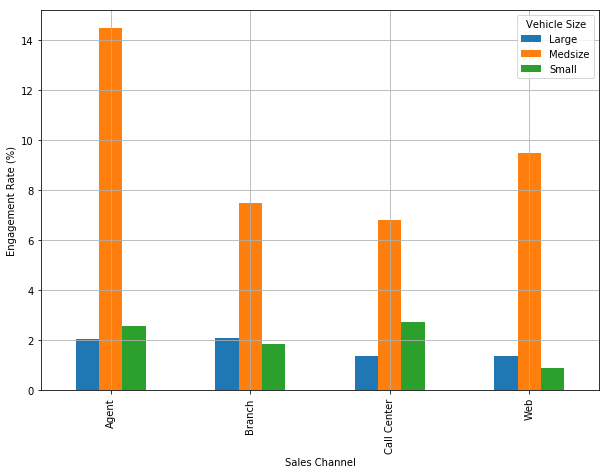

In [19]:
# Visualize this data in bar plot
ax = (by_sales_channel_df*100).plot(
  kind='bar',figsize=(10,7), grid=True
)
ax.set_ylabel('Engagement Rate (%)')
plt.show()

As we can see, customers with medium size vehicles respond the best to all sales channels
whereas the other customers differs slightly in terms of engagement rates across different sales
channels.

## 2.6 Engagement Rates by Months Since Policy Inception

In [20]:
by_months_since_inception_df = df.loc[
    df['Response'] == 'Yes', # count only engaged customers
].groupby([
    'Months Since Policy Inception' 
]).count()['Customer']/df.groupby('Months Since Policy Inception').count()['Customer'] * 100

by_months_since_inception_df.fillna(0)

Months Since Policy Inception
0     14.457831
1     14.117647
2     20.224719
3     26.315789
4     19.780220
5      6.896552
6      0.000000
7      7.594937
8      7.407407
9     18.750000
10    15.789474
11    17.307692
12     6.000000
13    14.814815
14     0.000000
15    22.018349
16     0.000000
17    11.881188
18    13.333333
19    16.981132
20    11.650485
21    11.428571
22    12.903226
23    20.454545
24    21.951220
25    13.483146
26    15.000000
27    12.371134
28    17.475728
29    12.244898
        ...    
70    23.529412
71    12.000000
72    23.762376
73     6.818182
74    19.780220
75     6.122449
76     6.976744
77    18.947368
78     7.317073
79    11.881188
80    16.438356
81    15.789474
82     0.000000
83    24.000000
84     6.000000
85    14.117647
86     0.000000
87     7.894737
88     7.894737
89    18.556701
90    14.285714
91     8.000000
92    16.216216
93    26.666667
94    25.000000
95    15.584416
96    17.910448
97     0.000000
98     0.000000
99     7.6

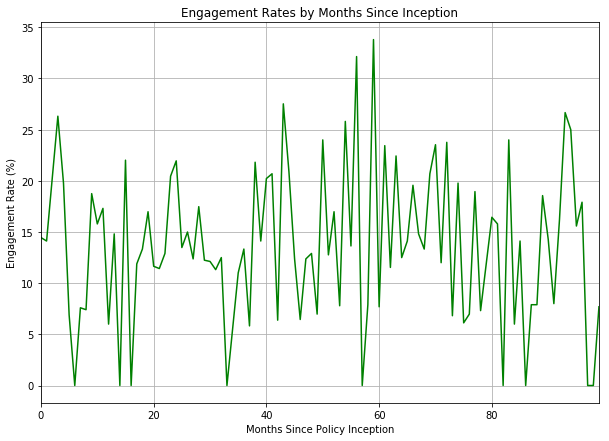

In [21]:
ax = by_months_since_inception_df.fillna(0).plot(
    figsize=(10, 7),
    title='Engagement Rates by Months Since Inception',
    grid=True,
    color='green'
)

ax.set_ylabel('Engagement Rate (%)')
plt.show()

## 3. Customer Segmentation by CLV & Months Since Policy Inception

In [22]:
# Take a look at the distribution of the Customer Lifetime Value
df['Customer Lifetime Value'].describe()

count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
25%       3994.251794
50%       5780.182197
75%       8962.167041
max      83325.381190
Name: Customer Lifetime Value, dtype: float64

In [23]:
#  define those customers with a CLV higher than the median as high-CLV customers, 
# and those with a CLV lower than the median as low-CLV customers.
df['CLV Segment'] = df['Customer Lifetime Value'].apply(
  lambda x: 'High' if x > df['Customer Lifetime Value'].median() else'Low'
)

In [24]:
# Do the same procedure for Months Since Policy Inception
df['Months Since Policy Inception'].describe()

count    9134.000000
mean       48.064594
std        27.905991
min         0.000000
25%        24.000000
50%        48.000000
75%        71.000000
max        99.000000
Name: Months Since Policy Inception, dtype: float64

In [25]:
df['Policy Age Segment'] = df['Months Since Policy Inception'].apply(
  lambda x: 'High' if x > df['Months Since Policy Inception'].median() else'Low'
)

In [26]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,CLV Segment,Policy Age Segment
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,Low,Low
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,High,Low
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,High,Low
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,High,High
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,Low,Low


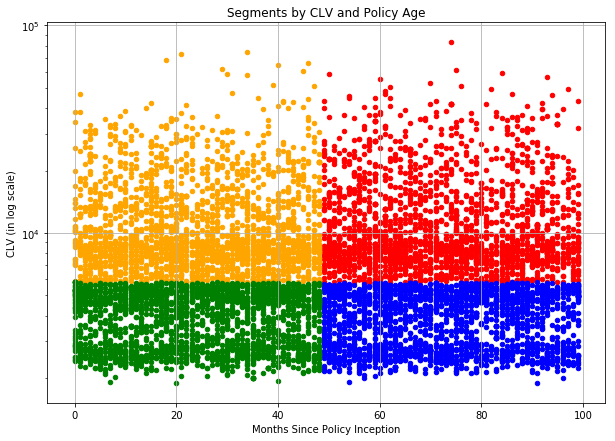

In [27]:
# Visualize these segments
ax = df.loc[
    (df['CLV Segment'] == 'High') & (df['Policy Age Segment'] == 'High')
].plot.scatter(
    x='Months Since Policy Inception',
    y='Customer Lifetime Value',
    logy=True, # 绘制y轴的对数图形
    color='red'
)

df.loc[
    (df['CLV Segment'] == 'Low') & (df['Policy Age Segment'] == 'High')
].plot.scatter(
    ax=ax,
    x='Months Since Policy Inception',
    y='Customer Lifetime Value',
    logy=True,
    color='blue'
)

df.loc[
    (df['CLV Segment'] == 'High') & (df['Policy Age Segment'] == 'Low')
].plot.scatter(
    ax=ax,
    x='Months Since Policy Inception',
    y='Customer Lifetime Value',
    logy=True,
    color='orange'
)

df.loc[
    (df['CLV Segment'] == 'Low') & (df['Policy Age Segment'] == 'Low')
].plot.scatter(
    ax=ax,
    x='Months Since Policy Inception',
    y='Customer Lifetime Value',
    logy=True, 
    color='green',
    grid=True,
    figsize=(10, 7)
)

ax.set_ylabel('CLV (in log scale)')
ax.set_xlabel('Months Since Policy Inception')
ax.set_title('Segments by CLV and Policy Age')

plt.show()



logy=True transform the scale to log scale and it is often used for monetary values as they
often have high skewness in their values. 

We have repeated the code for the plot.scatter 4 times
because we have created 4 segments.

In [28]:
# See whether there is any noticeable difference in the engagement rates among these
engagement_rates_by_segment_df = df.loc[
    df['Response'] == 'Yes'
].groupby([
    'CLV Segment', 'Policy Age Segment'
]). count()['Customer'] / df.groupby([
    'CLV Segment', 'Policy Age Segment'
]).count()['Customer']

engagement_rates_by_segment_df

CLV Segment  Policy Age Segment
High         High                  0.138728
             Low                   0.132067
Low          High                  0.162450
             Low                   0.139957
Name: Customer, dtype: float64

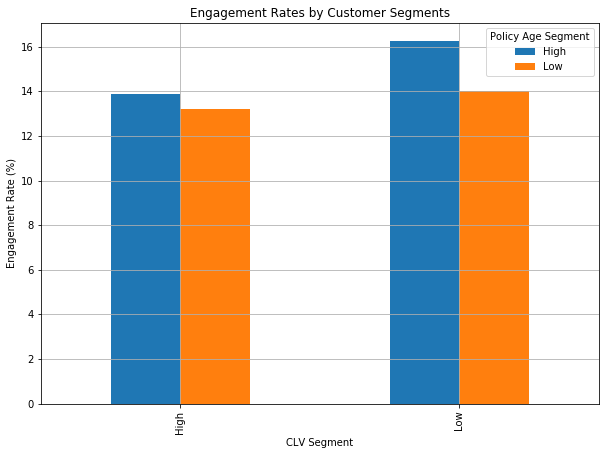

In [29]:
# Look at these differences in a chart
ax = (engagement_rates_by_segment_df.unstack()*100.0).plot(
    kind='bar',
    figsize=(10, 7),
    grid=True
)

ax.set_ylabel('Engagement Rate (%)')
ax.set_title('Engagement Rates by Customer Segments')

plt.show()

As we can notice, High Policy Age Segment has higher engagement than the Low Policy Age Segment. This suggests that those customers who have been insured by this company longer respond better. Moreover, the High Policy Age and Low CLV segment has the highest engagement rate among the four segments.


By creating different customer segments based on customer attributes, we can better understand how different groups of customers behave differently, and consequently, use this information to customize the marketing messagges.